In [36]:
print('Taslim Ansari 221P010')

Taslim Ansari 221P010


In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [38]:
df = pd.read_csv('placement.csv')

In [39]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


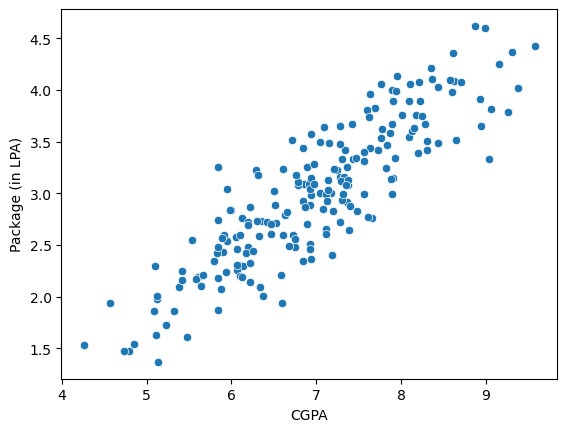

In [40]:
sns.scatterplot(x='cgpa', y='package', data=df)
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')
plt.show()

In [41]:
X = df.iloc[:,0:1] # input Column all rows0-1
y = df.iloc[:,-1] # output Column

In [42]:
X.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [43]:
y.head()

0    3.26
1    1.98
2    3.25
3    3.67
4    3.57
Name: package, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined (features and target)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(X_train,y_train) # for training

LinearRegression()

In [48]:
X_test.head()

,cgpa
95,6.63
15,7.25
30,7.36
158,5.95
128,7.93


In [49]:
y_test.head()

95     2.79
15     3.23
30     3.26
158    3.04
128    3.34
Name: package, dtype: float64

In [50]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.78031348])

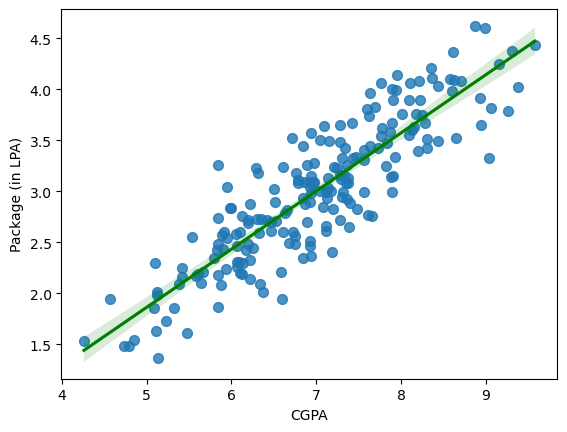

In [51]:
# Scatter plot with regression line using seaborn's regplot
sns.regplot(x='cgpa', y='package', data=df, scatter_kws={'s':50}, line_kws={'color':'green'})

plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')
plt.show()

In [52]:
m = lr.coef_ # slope

In [53]:
c = lr.intercept_ # intercept

In [54]:
# y = mx + b
# x cgpa
m * 8.58 + c

array([3.9001136])

In [55]:
m * 9.78 + c

array([4.58922137])

In [56]:
m * 100 + c

array([56.39864033])

In [57]:
def predict_package():
    try:
        cgpa = float(entry_cgpa.get())  # Get CGPA from the input field
        predicted_package = lr.predict(np.array([[cgpa]]))[0]  # Predict the package
        label_predicted.config(text=f'Predicted Package: {predicted_package:.2f} LPA')
    except ValueError:
        label_predicted.config(text="Invalid input. Please enter a valid CGPA.")

In [58]:
root = tk.Tk()
root.title('Placement Package Predictor')
root.geometry('800x400')

''

Text(0, 0.5, 'Package(in LPA)')

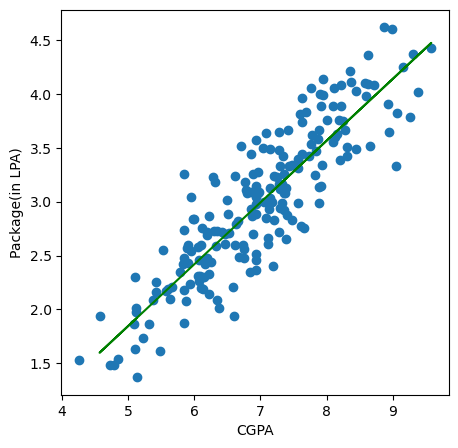

In [59]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color='green')
plt.xlabel('CGPA')
plt.ylabel('Package(in LPA)')

In [60]:
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH, expand=1)

frame_right = tk.Frame(root)
frame_right.pack(side=tk.LEFT, padx=20)
label_cgpa = tk.Label(frame_right, text='Enter CGPA : ')
label_cgpa.pack()
entry_cgpa = tk.Entry(frame_right)
entry_cgpa.pack()
btn_predict = tk.Button(frame_right, text='Predict', command=predict_package)
btn_predict.pack()
label_predicted = tk.Label(frame_right, text='Predicted Package : ')
label_predicted.pack()
root.mainloop()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
